In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/batches/online_batch/batch9am/Ecommerce Purchases.csv")

In [3]:
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [5]:
data[data['IP Address'].isna()]

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price


In [9]:
data['IP Address'].apply(lambda x :True if 192<=int(x.split(".")[0])<=223 else False).sum()

1268

In [23]:
data.applymap(lambda x : len(str(x)))

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,53,5,2,66,15,16,5,3,12,17,38,15,2,5
1,54,5,2,72,31,16,5,3,10,18,17,12,2,5
2,31,5,2,63,26,12,5,3,12,30,24,14,2,4
3,36,5,2,129,31,16,5,3,8,27,17,12,2,5
4,49,5,2,66,25,16,5,3,27,27,11,12,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,44,5,2,95,13,15,5,3,12,22,10,13,2,5
9996,52,5,2,63,24,15,5,3,12,18,15,14,2,5
9997,36,5,2,132,12,16,5,1,13,17,18,13,2,5
9998,35,5,2,100,8,15,5,3,16,23,24,12,2,5


In [29]:
data['Browser Info'][:10]

0    Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...
1    Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...
2    Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...
4    Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...
5    Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_5...
6    Mozilla/5.0 (compatible; MSIE 7.0; Windows NT ...
7    Mozilla/5.0 (X11; Linux i686) AppleWebKit/5350...
8    Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...
9    Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...
Name: Browser Info, dtype: object

In [30]:
data.partition("(")[-1].partition(";")[0]

AttributeError: 'DataFrame' object has no attribute 'partition'

In [32]:
data['Browser Info'].dtype

dtype('O')

In [31]:
data['Browser Info'].apply(lambda x : x.partition("(")[-1].partition(";")[0])

0                                                     X11
1                                              Windows 98
2                                              compatible
3                                               Macintosh
4                                                     X11
                              ...                        
9995    Windows NT 5.1) AppleWebKit/5352 (KHTML, like ...
9996                                           compatible
9997                                            Macintosh
9998                                            Macintosh
9999                                                  X11
Name: Browser Info, Length: 10000, dtype: object

In [33]:
data['Browser Info'].apply(lambda s :  s.split('(')[1].split(';')[0])

0                                     X11
1                              Windows 98
2                              compatible
3                               Macintosh
4                                     X11
                      ...                
9995    Windows NT 5.1) AppleWebKit/5352 
9996                           compatible
9997                            Macintosh
9998                            Macintosh
9999                                  X11
Name: Browser Info, Length: 10000, dtype: object

In [34]:
data["Browser Info"].str.split('(').str[1]

0       X11; Linux x86_64; sl-SI) Presto/2.9.183 Versi...
1       Windows 98; Win 9x 4.90; en-US) Presto/2.9.176...
2       compatible; MSIE 9.0; Windows NT 6.2; Trident/...
3       Macintosh; Intel Mac OS X 10_8_0 rv:3.0; en-US...
4       X11; Linux x86_64; it-IT) Presto/2.9.182 Versi...
                              ...                        
9995                    Windows NT 5.1) AppleWebKit/5352 
9996    compatible; MSIE 9.0; Windows NT 5.1; Trident/...
9997    Macintosh; U; Intel Mac OS X 10_7_8 rv:6.0; sl...
9998    Macintosh; Intel Mac OS X 10_8_8; rv:1.9.6.20)...
9999    X11; Linux i686; rv:1.9.5.20) Gecko/2013-11-22...
Name: Browser Info, Length: 10000, dtype: object

In [36]:
data['Browser Info'].apply(lambda x : x.split('(')[-1].split(';')[0])

0                                                    X11
1                                             Windows 98
2                                             compatible
3         KHTML, like Gecko) Version/5.1 Safari/531.27.1
4                                                    X11
                              ...                       
9995    KHTML, like Gecko) Chrome/14.0.877.0 Safari/5352
9996                                          compatible
9997     KHTML, like Gecko) Version/4.0.3 Safari/534.1.1
9998                                           Macintosh
9999                                                 X11
Name: Browser Info, Length: 10000, dtype: object

In [37]:
data['Browser Info'][:10].apply(lambda x: x.split('(')[-1].split(';')[0])

0                                                 X11
1                                          Windows 98
2                                          compatible
3      KHTML, like Gecko) Version/5.1 Safari/531.27.1
4                                                 X11
5    KHTML, like Gecko) Chrome/14.0.884.0 Safari/5312
6                                          compatible
7    KHTML, like Gecko) Chrome/15.0.841.0 Safari/5350
8    KHTML, like Gecko) Chrome/14.0.898.0 Safari/5330
9                                                 X11
Name: Browser Info, dtype: object

In [41]:
def extract_browser(br):
    return br.partition("(")[-1].partition(";")[0]

data['Browser Info'].apply(extract_browser)


0                                                     X11
1                                              Windows 98
2                                              compatible
3                                               Macintosh
4                                                     X11
                              ...                        
9995    Windows NT 5.1) AppleWebKit/5352 (KHTML, like ...
9996                                           compatible
9997                                            Macintosh
9998                                            Macintosh
9999                                                  X11
Name: Browser Info, Length: 10000, dtype: object

In [52]:
data['Browser Info'].apply(lambda x : x.split("(")[1].split(")")[0].split(";")[0]).value_counts()

X11                2322
Macintosh          2061
compatible         2052
Windows             630
iPod                623
Windows 98          390
Windows NT 6.1      210
Windows NT 5.01     209
Windows NT 5.1      209
Windows 95          202
Windows NT 5.2      199
Windows CE          184
Windows NT 4.0      183
Windows NT 5.0      181
Windows NT 6.0      179
Windows NT 6.2      166
Name: Browser Info, dtype: int64

In [53]:
salary = pd.read_csv("C:/batches/online_batch/batch_7pm/Data_Science/Salaries.csv")

In [54]:
salary.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [57]:
salary['Year'].value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [59]:
salary.groupby("Year")['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [61]:
(salary[salary['Year'] == 2013]['JobTitle'].value_counts() == 1).sum()

202

In [62]:
salary[salary['JobTitle'].str.lower().str.contains('chief')]['JobTitle'].size

627

In [65]:
salary['JobTitle'].apply(lambda x : True if "chief".lower() in x.lower().split() else False).sum()

477

### Covariance
    Relationship between 2 variables 
        It only tells the type of relationship
            either positive or negative
            
$$ cov = \frac {\sum\limits_{i=0}^N (x_i - \bar x) (y_i - \bar y)} {N} $$
            
### Correlation
       Relationship between 2 variables 
           1. sign (+ or -)
           2. strength (mag)
       Its mag is from 0 to 1
       
$$ cor = \frac {\sum\limits_{i=0}^N (x_i - \bar x) (y_i - \bar y)} {N\sqrt{(\sigma x \sigma y)}} $$

In [66]:
x = np.linspace(1, 10, 10)

In [67]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [68]:
y = x**2

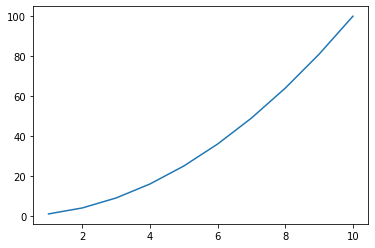

In [69]:
plt.plot(x, y)

In [70]:
np.corrcoef(x, y)

array([[1.        , 0.97455863],
       [0.97455863, 1.        ]])

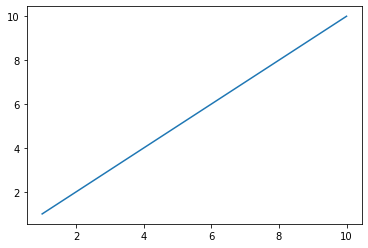

In [71]:
plt.plot(x, x)

In [83]:
np.corrcoef([x, x, y])

array([[1.        , 1.        , 0.97455863],
       [1.        , 1.        , 0.97455863],
       [0.97455863, 0.97455863, 1.        ]])

In [75]:
salary.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN,NaN
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN,NaN
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN,NaN
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN,NaN
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN,NaN
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN,NaN
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN,NaN
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


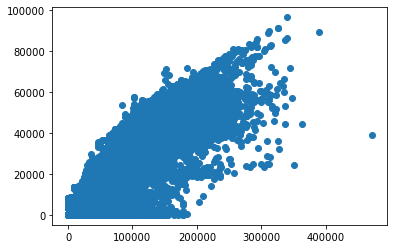

In [76]:
plt.plot(salary['TotalPay'], salary['Benefits'], 'o')

In [77]:
salary.shape

(148654, 13)

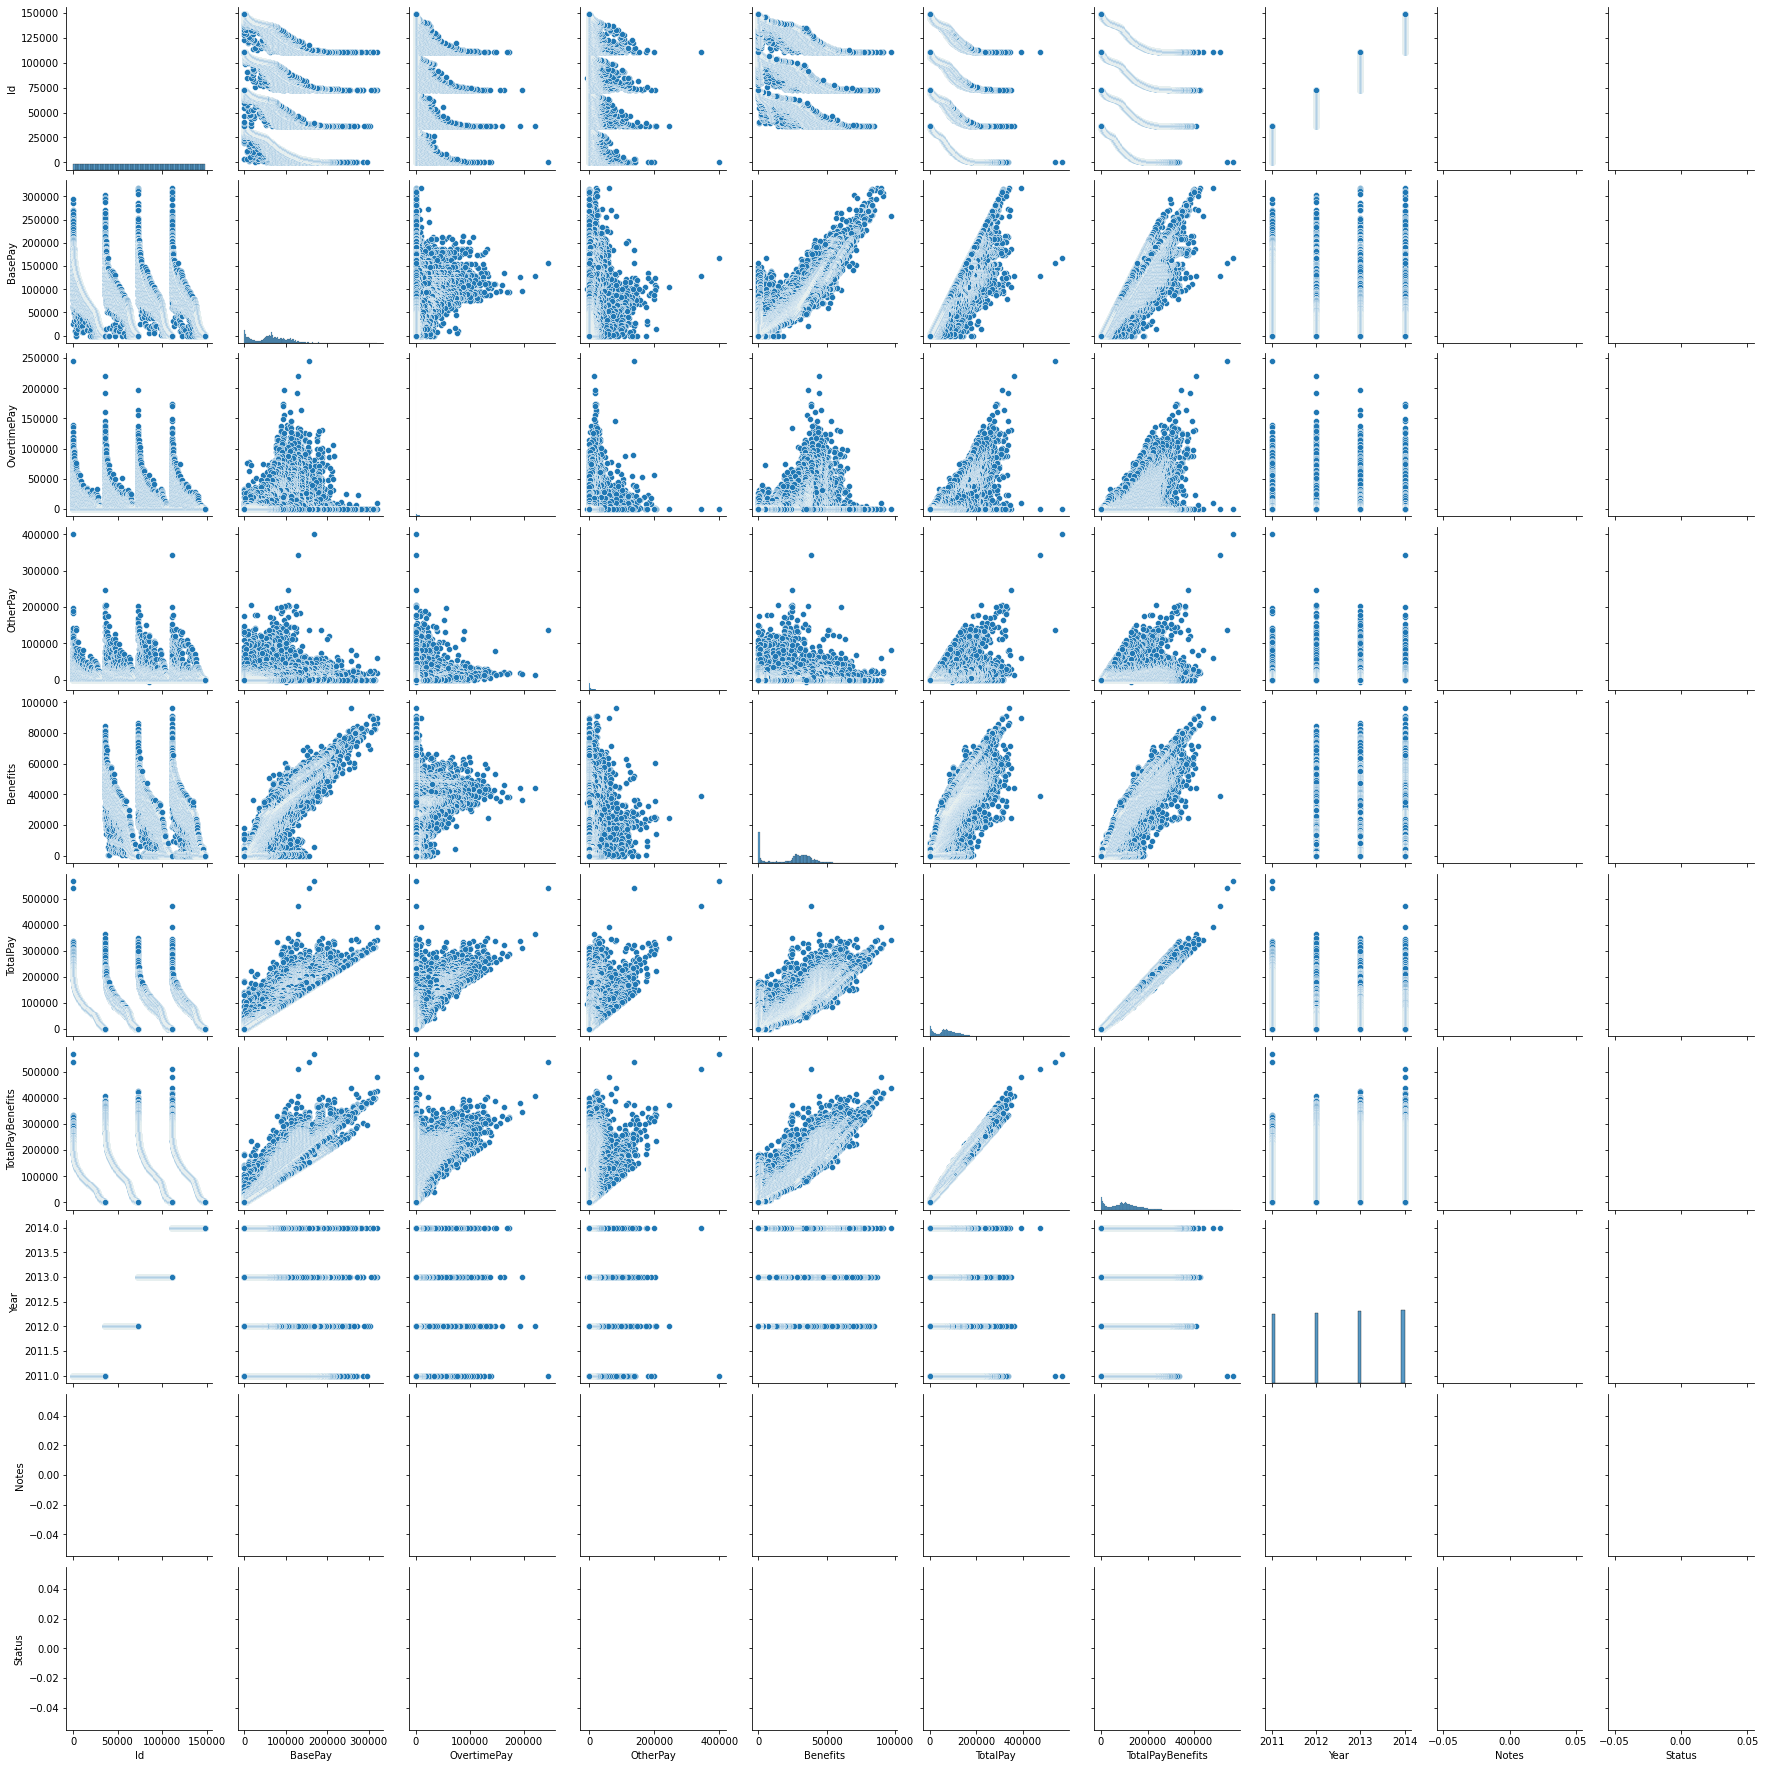

In [78]:
sns.pairplot(salary)

In [80]:
salary[['BasePay']].corrwith(salary['TotalPayBenefits'])

BasePay    0.946595
dtype: float64

In [84]:
salary[['BasePay', 'TotalPay']].corrwith(salary['TotalPayBenefits'])

BasePay     0.946595
TotalPay    0.977313
dtype: float64

In [87]:
salary[['BasePay', 'TotalPay']].corrwith(salary['TotalPayBenefits'])

BasePay     0.946595
TotalPay    0.977313
dtype: float64

In [88]:
salary[['BasePay', 'TotalPay']].corr()

,BasePay,TotalPay
BasePay,1.000000,0.954494
TotalPay,0.954494,1.000000


In [95]:
df = pd.DataFrame({
    "X" : x,
    "Y" : x**2
})

In [96]:
df.corr()

,X,Y
X,1.000000,0.974559
Y,0.974559,1.000000


In [101]:
salary[salary['TotalPayBenefits'].isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [102]:
np.corrcoef([salary['TotalPayBenefits'], salary['TotalPay']])

array([[1.        , 0.97731285],
       [0.97731285, 1.        ]])

In [104]:
salary[['TotalPayBenefits']].corrwith(salary['JobTitle'].apply(lambda x : len(x)))

TotalPayBenefits   -0.036878
dtype: float64

In [ ]:
salary.cov()